In [1]:
# !pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import spacy
import logging
import openpyxl
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

class DataFrameFilter:
    def __init__(self, df: pd.DataFrame):
        self.df = df

    # def filter_by_quarter_and_year(self, year: int, quarters: list) -> pd.DataFrame:
    def filter_by_year(self, year: int) -> pd.DataFrame:
        filtered_df = self.df[
            # (self.df['date'].dt.year == year) & (self.df['date'].dt.quarter.isin(quarters))
            self.df['date'].dt.year == year
        ]
        return filtered_df

In [4]:
df = pd.read_excel(f"df_lemmatized_no_short_msg.xlsx")

In [5]:
print(df)

            date                    channel  \
0     2024-12-29                Движение.ру   
1     2024-12-28                Движение.ру   
2     2024-12-28                Движение.ру   
3     2024-12-28                Движение.ру   
4     2024-12-28                Движение.ру   
...          ...                        ...   
91542 2020-03-11  Pro недвижимость. Smarent   
91543 2020-03-11  Pro недвижимость. Smarent   
91544 2020-02-16  Pro недвижимость. Smarent   
91545 2019-05-10  Pro недвижимость. Smarent   
91546 2019-05-05  Pro недвижимость. Smarent   

                                                 message  \
0       Топ скандала  года в строительной отрасли\n\n...   
1      Оцениваем жилье Деда Мороза \n\nВдохновляясь л...   
2      В последние дни все обсуждают ремонты от застр...   
3      Setl Group построит в Ленобласти квартал на  т...   
4       Весной  года число желающих строить частные д...   
...                                                  ...   
91542  ВЫВОД \n

In [6]:
# Фильтрация сообщений по длине
filtered_df = df[(df['lemmatized_message'].str.split().str.len() < 20) | (df['lemmatized_message'].str.split().str.len() > 400)]

# Подсчёт количества таких сообщений за 2024 год
total_filtered_2024 = len(filtered_df[filtered_df['date'].dt.year == 2024])
print(f"Количество сообщений с длиной < 10 или > 400 слов в 2024 году: {total_filtered_2024}")

Количество сообщений с длиной < 10 или > 400 слов в 2024 году: 0


In [7]:
# Определение переменных для года
year_var = 2024

# Использование переменных для фильтрации
filter_instance = DataFrameFilter(df)
df_qq_2024 = filter_instance.filter_by_year(year_var)

In [8]:
# Печать количества строк в отфильтрованном DataFrame (для проверки)
# print(f"Number of rows for Q{quarter_1} and Q{quarter_2} {year_var}: {len(df_qq_2024)}")

# Get unique values in the 'channel' column of df_q3_q4_2024
unique_channels = df_qq_2024['channel'].unique()

# Create an empty DataFrame to store the results
df_unique_channels = pd.DataFrame()

# Iterate over unique 'channel' values and add the first row for each
for channel in unique_channels:
    df_channel = df_qq_2024[df_qq_2024['channel'] == channel].head(1)  # Take only the first row
    df_unique_channels = pd.concat([df_unique_channels, df_channel], ignore_index=True)

# Print the number of rows in the new DataFrame (for verification)
# print(f"Number of rows with unique channels (Q{quarter_1} and Q{quarter_2} {year_var}): {len(df_unique_channels)}")

# Print the first few rows of the filtered DataFrame (for verification)
print(df_unique_channels.head())

        date                                channel  \
0 2024-12-29                            Движение.ру   
1 2024-12-29                          Всё о стройке   
2 2024-12-29                   Железобетонный замес   
3 2024-12-28  Ипотека в России. Новости и аналитика   
4 2024-12-29                 Ипотека и недвижимость   

                                             message  \
0   Топ скандала  года в строительной отрасли\n\n...   
1  Сбербанк купил  доли в компании которая возвод...   
2  Год за годом Донстрой подводил итоги строитель...   
3   Основные итоги прошедшей недели  декабря по в...   
4   Убирать в доме с  по  января категорически не...   

                                       message_clean  \
0  Топ скандала года строительной отрасли марте К...   
1  Сбербанк купил доли компании которая возводит ...   
2  Год годом Донстрой подводил итоги строительств...   
3  Основные итоги прошедшей недели декабря версии...   
4  Убирать доме января категорически астрологи Сп...

In [9]:
import os
os.environ["OPENAI_API_KEY"] = "..."  # Replace with your API key

In [10]:
# !pip install scikit-learn

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# !pip install wordcloud

In [13]:
# !pip install nltk

In [14]:
# !pip uninstall openai
# !pip install OpenAI

In [15]:
# !pip install --upgrade typing_extensions

In [16]:
# !pip install Jinja2

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import os
from openai import OpenAI
from IPython.display import display
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import random

In [18]:
# Ensure nltk stopwords are downloaded
try:
    stopwords.words('russian') # or 'english', depending on your messages
except LookupError:
    nltk.download('stopwords')

In [19]:
# --- 0. Load Data (Assuming df_q3_q4_2024 is already defined) ---
# Replace this with your actual data loading if needed
# df = pd.read_excel("your_data.xlsx") # Example
df = df_qq_2024.copy()  # Create a copy to avoid modifying original

# --- 1. Data Preparation ---
df['lemmatized_message'] = df['lemmatized_message'].fillna('')

# Убедитесь, что столбец 'quarter' добавлен в DataFrame
df['quarter'] = df['date'].dt.quarter
df.head()

# --- 2. TF-IDF Vectorization ---
print("\nPerforming TF-IDF Vectorization...")
all_stopwords = set(stopwords.words('russian') + list(ENGLISH_STOP_WORDS))
tfidf_vectorizer = TfidfVectorizer(stop_words=list(all_stopwords), max_df=0.95, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_message'])
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

# --- 3. Choose Number of Components for SVD ---
n_components = min(50, tfidf_matrix.shape[1] - 1)
print(f"\nNumber of components for SVD: {n_components}")

# --- 4. Apply SVD ---
print("\nApplying Truncated SVD...")
svd_model = TruncatedSVD(n_components=n_components, random_state=42)
svd_matrix = svd_model.fit_transform(tfidf_matrix)
print(f"SVD Matrix Shape: {svd_matrix.shape}")
print(f"Explained Variance Ratio: {svd_model.explained_variance_ratio_.sum():.4f}")


# --- 5. Clustering with K-Means ---
n_clusters = 50 # Number of clusters
print(f"\nPerforming K-Means Clustering with {n_clusters} clusters...")
kmeans_model = KMeans(n_clusters=n_clusters, n_init=10, random_state=42) # Explicitly set n_init
df['cluster'] = kmeans_model.fit_predict(svd_matrix)  # Add cluster assignments to DataFrame
print("Clustering complete.")


Performing TF-IDF Vectorization...
TF-IDF Matrix Shape: (23871, 32163)

Number of components for SVD: 50

Applying Truncated SVD...
SVD Matrix Shape: (23871, 50)
Explained Variance Ratio: 0.1261

Performing K-Means Clustering with 50 clusters...
Clustering complete.


In [20]:
df.head()

,date,channel,message,message_clean,lemmatized_message,message_length,msg_id,quarter,cluster
0,2024-12-29,Движение.ру,Топ скандала года в строительной отрасли\n\n...,Топ скандала года строительной отрасли марте К...,топ скандал год строительный отрасль март кирг...,90,1,4,0
1,2024-12-28,Движение.ру,Оцениваем жилье Деда Мороза \n\nВдохновляясь л...,Оцениваем жилье Деда Мороза Вдохновляясь литер...,оценивать жильё дед мороз вдохновляться литера...,33,2,4,0
2,2024-12-28,Движение.ру,В последние дни все обсуждают ремонты от застр...,последние дни обсуждают ремонты застройщиков п...,последний день обсуждать ремонт застройщик пре...,34,3,4,0
3,2024-12-28,Движение.ру,Setl Group построит в Ленобласти квартал на т...,Setl Group построит Ленобласти квартал тыс м ж...,setl group построить ленобласть квартал тыс м ...,47,5,4,19
4,2024-12-28,Движение.ру,Весной года число желающих строить частные д...,Весной года число желающих строить частные дом...,весна год число желать строить частный дом уве...,67,6,4,33


In [21]:
def analyze_quarters(df: pd.DataFrame, year: int) -> None:
    for i, (quarter_1, quarter_2) in enumerate(zip(range(1, 4), range(2, 5)), start=1):
        print(f"\nAnalyzing Quarter {quarter_1} and Quarter {quarter_2} for {year}...")
        df_q1_q2 = df[(df['date'].dt.year == year) & (df['date'].dt.quarter.isin([quarter_1, quarter_2]))]
        
        # Calculate overall counts per quarter
        total_q1 = len(df_q1_q2[df_q1_q2['quarter'] == quarter_1])
        total_q2 = len(df_q1_q2[df_q1_q2['quarter'] == quarter_2])
        print(f"Total messages in Quarter {quarter_1}: {total_q1}")
        print(f"Total messages in Quarter {quarter_2}: {total_q2}")
        
        # Create a summary DataFrame
        cluster_summary = []
        for cluster_num in range(n_clusters):
            cluster_data = df_q1_q2[df_q1_q2['cluster'] == cluster_num]
            q1_count = len(cluster_data[cluster_data['quarter'] == quarter_1])
            q2_count = len(cluster_data[cluster_data['quarter'] == quarter_2])

            q1_percentage = (q1_count / total_q1) * 100 if total_q1 > 0 else 0
            q2_percentage = (q2_count / total_q2) * 100 if total_q2 > 0 else 0

            count_change = q2_count - q1_count
            percentage_change = q2_percentage - q1_percentage

            cluster_summary.append({
                'cluster': cluster_num,
                'q1_count': q1_count,
                'q1_percentage': q1_percentage,
                'q2_count': q2_count,
                'q2_percentage': q2_percentage,
                'count_change': count_change,
                'percentage_change': percentage_change
            })

        cluster_summary_df = pd.DataFrame(cluster_summary)

        # Add topic summary to cluster_summary_df
        cluster_summary_df['topic_summary'] = cluster_summary_df['cluster'].map(cluster_topic_summaries)

        # Select Top 5 Clusters with Largest Percentage Change
        top_5_clusters = cluster_summary_df.nlargest(5, 'percentage_change')

        # Display Top 5 Clusters with Styling
        top_5_styled = top_5_clusters.style.format({
            'q1_percentage': "{:.2f}%",
            'q2_percentage': "{:.2f}%",
            'percentage_change': "{:.2f}%"
        }).background_gradient(
            subset=['percentage_change'], cmap='RdYlGn'
        ).set_properties(
            subset=['topic_summary'], **{'width': '300px'}
        )
        display(top_5_styled)

        # Save styled DataFrame for each comparison
        globals()[f'top_5_styled_{i}'] = top_5_styled

In [22]:
# --- 7. LLM-Based Topic Summarization ---
print("\nSummarizing cluster topics using LLM...")

# --- 0. Load LLM API Key ---
api_key = os.environ.get("OPENAI_API_KEY")
if not api_key:
    raise ValueError("OpenAI API key not found. Please set the OPENAI_API_KEY environment variable.")

client = OpenAI(api_key=api_key)

model_name = "gpt-3.5-turbo"

def summarize_cluster_topic(cluster_messages, model_name=model_name, max_length=1024):
    """Summarizes the topic of a cluster using an LLM, requesting a Russian summary."""
    if not cluster_messages:
        return "Нет сообщений в этом кластере."

    # truncated_messages = cluster_messages[:10]
    truncated_messages = random.sample(cluster_messages, min(10, len(cluster_messages)))

    # Modify the prompt to explicitly request a Russian summary
    prompt = f"Пожалуйста, подведите итог главной темы следующих сообщений на русском языке:\n\n"
    prompt += "\n".join(truncated_messages)
    prompt += "\n\nКраткое описание темы (на русском языке):"

    try:
        completion = client.chat.completions.create(
            model=model_name,
            messages=[
                {"role": "system", "content": "Ты — полезный помощник, который подводит итоги текстовых тем на русском языке."},
                {"role": "user", "content": prompt},
            ],
            max_tokens=200,
            temperature=0.5,
        )
        summary = completion.choices[0].message.content
        return summary.strip()
    except Exception as e:
        print(f"Ошибка при подведении итогов кластера: {e}")
        return "Ошибка при создании сводки."


cluster_topic_summaries = {}
for cluster_num in range(n_clusters):
    print(f"\n--- Подведение итогов по кластеру {cluster_num} ---")
    cluster_messages = df[df['cluster'] == cluster_num]['message_clean'].sample(
        10, random_state=42, replace=True
    ).tolist()
    topic_summary = summarize_cluster_topic(cluster_messages, model_name=model_name)
    cluster_topic_summaries[cluster_num] = topic_summary
    print(f"  Краткое описание темы: {topic_summary}")


Summarizing cluster topics using LLM...

--- Подведение итогов по кластеру 0 ---
  Краткое описание темы: Тема текстовых сообщений включает в себя различные аспекты: планировочные решения проекта Cityzen MR, расследование злоупотреблений в Минобороны, развитие инфраструктуры аэротакси в Китае, строительство небоскребов, празднование Дня Победы, мораторий на штрафы за срыв сдачи домов, строительное искусство, рейтинг профессий для получения ипотечного кредита, замороженное направление венчурных инвестиций в Самолете, и разработка саморазогрева

--- Подведение итогов по кластеру 1 ---
  Краткое описание темы: Тема текстовых сообщений заключается в анализе ситуации на рынке жилищного строительства в России. Обсуждаются падение продаж новостроек, отмена льготной ипотеки, объем нераспроданного жилья, планы по увеличению ввода жилья, статистика по строительству и продажам, цены на жилье, проблемы с диспропорциями на рынке новостроек. Также упоминаются важные заявления вицепремьера РФ Марата

In [23]:
# df = df_qq_2024.copy()  # Create a copy to avoid modifying original

In [24]:
# Убедитесь, что столбец 'quarter' добавлен в DataFrame
# df['quarter'] = df['date'].dt.quarter
df.head()

,date,channel,message,message_clean,lemmatized_message,message_length,msg_id,quarter,cluster
0,2024-12-29,Движение.ру,Топ скандала года в строительной отрасли\n\n...,Топ скандала года строительной отрасли марте К...,топ скандал год строительный отрасль март кирг...,90,1,4,0
1,2024-12-28,Движение.ру,Оцениваем жилье Деда Мороза \n\nВдохновляясь л...,Оцениваем жилье Деда Мороза Вдохновляясь литер...,оценивать жильё дед мороз вдохновляться литера...,33,2,4,0
2,2024-12-28,Движение.ру,В последние дни все обсуждают ремонты от застр...,последние дни обсуждают ремонты застройщиков п...,последний день обсуждать ремонт застройщик пре...,34,3,4,0
3,2024-12-28,Движение.ру,Setl Group построит в Ленобласти квартал на т...,Setl Group построит Ленобласти квартал тыс м ж...,setl group построить ленобласть квартал тыс м ...,47,5,4,19
4,2024-12-28,Движение.ру,Весной года число желающих строить частные д...,Весной года число желающих строить частные дом...,весна год число желать строить частный дом уве...,67,6,4,33


In [25]:
# Пример использования функции
analyze_quarters(df, year_var)


Analyzing Quarter 1 and Quarter 2 for 2024...
Total messages in Quarter 1: 5425
Total messages in Quarter 2: 5844


,cluster,q1_count,q1_percentage,q2_count,q2_percentage,count_change,percentage_change,topic_summary
12,12,194,3.58%,343,5.87%,149,2.29%,"Главная тема сообщений заключается в различных аспектах рынка недвижимости в России и других странах, таких как Китай и Таджикистан. В сообщениях затрагиваются такие вопросы, как финансовые проблемы крупных застройщиков, ухудшение ситуации в отрасли из-за массовых случаев негативного отношения, нехватка средств размещения из-за роста внутреннего туризма, снижение обеспеченности граждан торговыми центрами, изменения в законодательстве"
17,17,210,3.87%,281,4.81%,71,0.94%,"Обсуждение в текстах касается строительства жилья и жилищно-коммунального хозяйства в России. Рассматриваются вопросы модернизации системы ЖКХ, разработки новых проектов, усовершенствования управления многоквартирными домами, регулирования риелторской деятельности, а также национальных проектов в сфере жилищного строительства. Важными аспектами являются повышение доступности жилья для граждан, улучшение инфраструктуры и финансовая поддержка"
37,37,105,1.94%,163,2.79%,58,0.85%,"Обсуждение семейной ипотеки в России, включая предложения по изменению правил программы, расширение условий для многодетных семей, пилотные проекты по выплатам многодетным семьям, а также анализ влияния ограничений на кредитование и строительство жилья."
46,46,15,0.28%,53,0.91%,38,0.63%,"Из сообщений можно выделить основную тему — изменения и нововведения в ипотечных программах и условиях нескольких крупных банков России, таких как ВТБ и Сбербанк. В частности, рассматриваются вопросы интеграции Почта Банка в структуру ВТБ, ужесточение условий ипотечных программ, присоединение Почта банка к ВТБ, возобновление выдачи семейной ипотеки, изменение ставок и условий ипотечных программ, а также отмена комиссий застройщиков-партнеров при выдаче ипот"
19,19,121,2.23%,166,2.84%,45,0.61%,"Обсуждение различных строительных проектов в различных регионах России, включая строительство жилья, инфраструктуры, логистических объектов, общественных пространств и культурно-образовательных комплексов. Также рассматривается сотрудничество между различными девелоперскими компаниями и заключение соглашений с властями регионов для реализации различных проектов."



Analyzing Quarter 2 and Quarter 3 for 2024...
Total messages in Quarter 2: 5844
Total messages in Quarter 3: 5914


,cluster,q1_count,q1_percentage,q2_count,q2_percentage,count_change,percentage_change,topic_summary
25,25,46,0.79%,105,1.78%,59,0.99%,"Из сообщений можно сделать вывод, что основной темой является ипотечное кредитование в российских банках. В текстах упоминаются различные банки, условия ипотечных программ, изменения в ставках, нововведения в ипотечной сфере, а также реакция на изменения ключевой ставки Центробанка. Также обсуждаются льготные программы ипотеки для различных категорий граждан, влияние новых стандартов на ставки ипотеки, аналитика и прогнозы по развитию рынка ипотечного кред"
10,10,220,3.76%,281,4.75%,61,0.99%,"Тема всех сообщений заключается в строительстве и развитии коммерческой и жилой недвижимости в Москве и других регионах России. Речь идет о проектах застройки, инфраструктуре, благоустройстве, проблемах с коммунальной инфраструктурой, разрешениях на строительство, а также инновационных подходах в создании комфортной городской среды. Важными аспектами являются качество строительства, инфраструктура проектов, вовлечение клиентов и привлечение инвесторов."
14,14,71,1.21%,108,1.83%,37,0.61%,"Тема касается ключевой ставки Центрального банка России и ее влияния на экономику, рынок недвижимости и ипотеку. В сообщениях обсуждаются ожидания повышения ключевой ставки, решения ЦБ по ее сохранению, предложения депутатов и мнения экспертов о возможном изменении ставки. Также затрагиваются вопросы инфляции, прогнозы по ставке на будущее, отношение политиков и игроков рынка к данной теме."
40,40,65,1.11%,98,1.66%,33,0.54%,"Обсуждаются изменения в условиях ипотечного кредитования различных банков в России. Темы включают повышение ставок, изменения в минимальных первоначальных взносах, возможности для молодежи, условия семейной ипотеки, программы рефинансирования и различные виды залога. Банки также сообщают о новых условиях, сроках одобрения заявок и выдачи кредитов."
29,29,75,1.28%,102,1.72%,27,0.44%,"Итоговая тема текстовых сообщений: изменения в ипотечном кредитовании и рынке недвижимости в различных регионах России. Обсуждается ужесточение условий ипотечного кредитования, сокращение объемов выдачи кредитов, компенсации для молодых мам, субсидии для водителей общественного транспорта, предложения новостроек, меры поддержки многодетных семей, продажи от девелоперов, прогнозирование паводков в Тюменской области."



Analyzing Quarter 3 and Quarter 4 for 2024...
Total messages in Quarter 3: 5914
Total messages in Quarter 4: 6688


,cluster,q1_count,q1_percentage,q2_count,q2_percentage,count_change,percentage_change,topic_summary
17,17,204,3.45%,325,4.86%,121,1.41%,"Обсуждение в текстах касается строительства жилья и жилищно-коммунального хозяйства в России. Рассматриваются вопросы модернизации системы ЖКХ, разработки новых проектов, усовершенствования управления многоквартирными домами, регулирования риелторской деятельности, а также национальных проектов в сфере жилищного строительства. Важными аспектами являются повышение доступности жилья для граждан, улучшение инфраструктуры и финансовая поддержка"
14,14,108,1.83%,201,3.01%,93,1.18%,"Тема касается ключевой ставки Центрального банка России и ее влияния на экономику, рынок недвижимости и ипотеку. В сообщениях обсуждаются ожидания повышения ключевой ставки, решения ЦБ по ее сохранению, предложения депутатов и мнения экспертов о возможном изменении ставки. Также затрагиваются вопросы инфляции, прогнозы по ставке на будущее, отношение политиков и игроков рынка к данной теме."
2,2,65,1.10%,152,2.27%,87,1.17%,"Из сообщений видно, что обсуждается увеличение лимитов программы семейной и льготной ипотеки в России. Вицепремьер Марат Хуснуллин и другие представители государства высказывают мнение о необходимости увеличения лимитов, банки сообщают о исчерпании выделенных средств. Минфин также планирует увеличить лимиты для банков и организаций, участвующих в программе. Обсуждается нехватка средств, перераспределение лимитов и влияние на рынок недв"
23,23,120,2.03%,194,2.90%,74,0.87%,"Основная тема сообщений заключается в обсуждении текущего состояния кредитования населения в России, особенно в сфере ипотечного и потребительского кредитования. Обсуждаются изменения в выдаче кредитов, ужесточение условий кредитования, снижение кредитного импульса, рост ставок по ипотеке, перспективы рынка ипотеки, предложения Центробанка по ужесточению правил кредитования, а также вопросы рефинансирования ипотечных кредитов. Также затрагивается т"
22,22,226,3.82%,305,4.56%,79,0.74%,"Обзор рынка недвижимости, инвестиции в строительство, анализ инвестиционных трендов, рассмотрение рынка апартаментов в Москве, программы семейной ипотеки, возвращение нотариусов к сделкам с недвижимостью, развитие района Пресня в Москве, инвестиционные возможности в апартотелях, курсы по карьере в сфере недвижимости, новый закон о блогерах, анализ прогноза на рынке жилищного строительства."


In [26]:
from sklearn.decomposition import PCA
def plot_elbow_method(data, max_k=100):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.xlabel('Количество кластеров')
    plt.ylabel('SSE')
    plt.title('Метод локтя')
    plt.show()

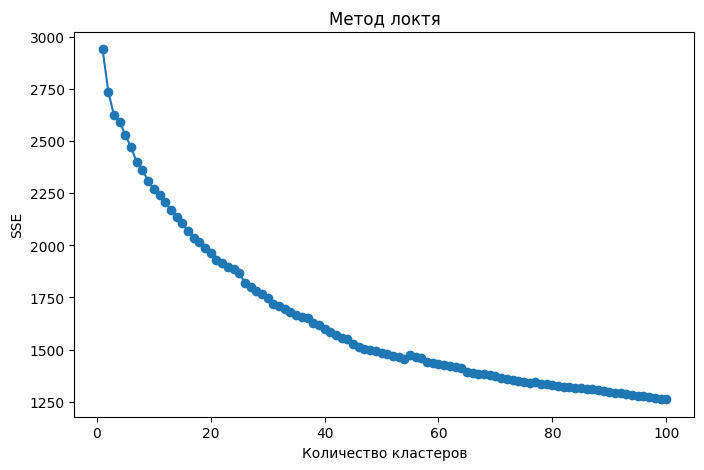

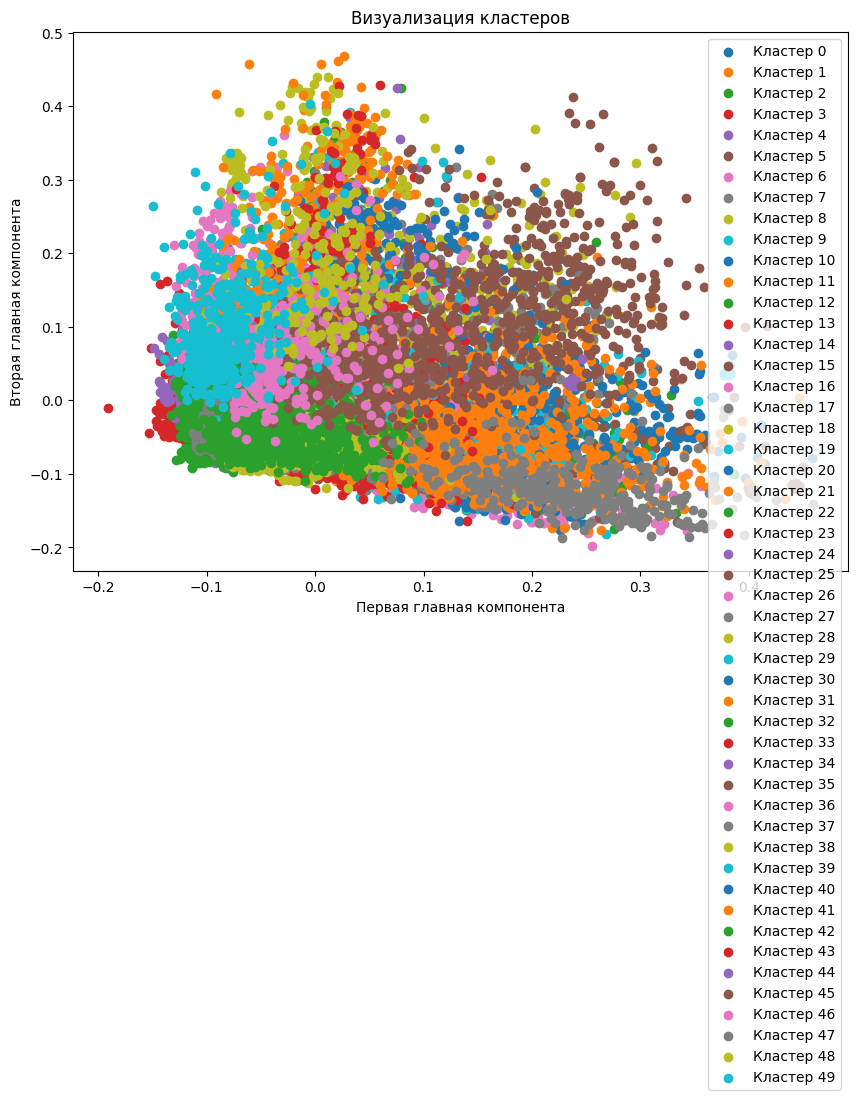

In [27]:

def plot_elbow_method(data, max_k=100):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.xlabel('Количество кластеров')
    plt.ylabel('SSE')
    plt.title('Метод локтя')
    plt.show()

# Пример использования
plot_elbow_method(svd_matrix)

def plot_clusters(data, labels, n_clusters):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    
    plt.figure(figsize=(10, 7))
    for i in range(n_clusters):
        plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Кластер {i}')
    
    plt.xlabel('Первая главная компонента')
    plt.ylabel('Вторая главная компонента')
    plt.title('Визуализация кластеров')
    plt.legend()
    plt.show()

def plot_clusters_3d(data, labels, n_clusters):
    pca = PCA(n_components=3)
    reduced_data = pca.fit_transform(data)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    for i in range(n_clusters):
        ax.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], reduced_data[labels == i, 2], label=f'Кластер {i}')
    
    ax.set_xlabel('Первая главная компонента')
    ax.set_ylabel('Вторая главная компонента')
    ax.set_zlabel('Третья главная компонента')
    ax.set_title('3D Визуализация кластеров')
    ax.legend()
    plt.show()

optimal_k = 50  # Замените 5 на выбранное вами значение

# Пример использования
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(svd_matrix)
plot_clusters(svd_matrix, labels, optimal_k)

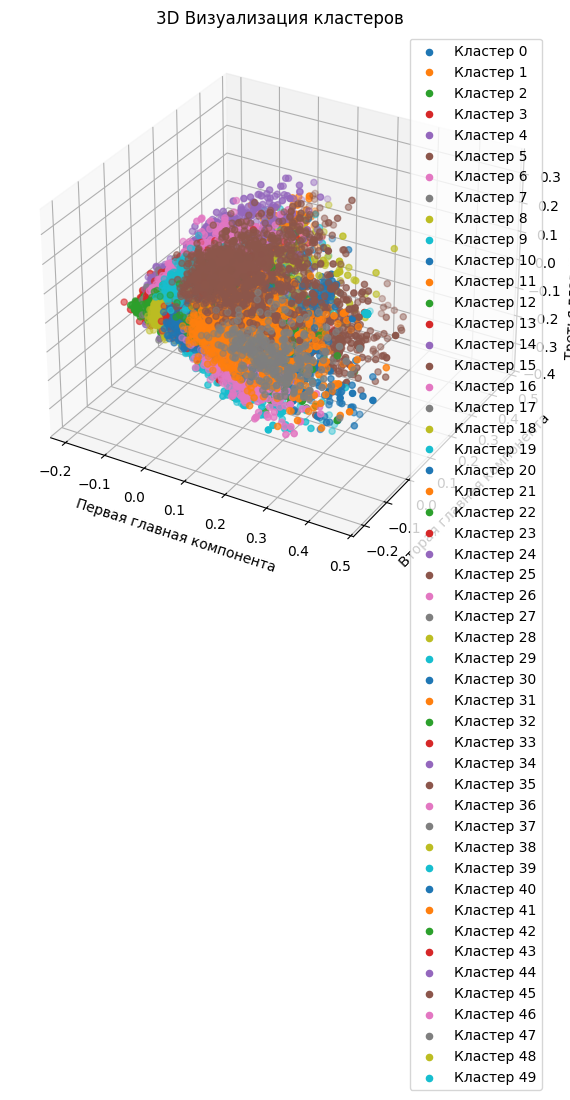

In [30]:
plot_clusters_3d(svd_matrix, labels, optimal_k)

In [28]:

cluster_counts = df['cluster'].value_counts().sort_index()

print("Количество сообщений в каждом кластере:")
for cluster_num, count in cluster_counts.items():
    print(f"Кластер {cluster_num}: {count} сообщений")

Количество сообщений в каждом кластере:
Кластер 0: 3296 сообщений
Кластер 1: 236 сообщений
Кластер 2: 334 сообщений
Кластер 3: 266 сообщений
Кластер 4: 442 сообщений
Кластер 5: 368 сообщений
Кластер 6: 763 сообщений
Кластер 7: 127 сообщений
Кластер 8: 120 сообщений
Кластер 9: 161 сообщений
Кластер 10: 990 сообщений
Кластер 11: 372 сообщений
Кластер 12: 1152 сообщений
Кластер 13: 51 сообщений
Кластер 14: 441 сообщений
Кластер 15: 286 сообщений
Кластер 16: 74 сообщений
Кластер 17: 1020 сообщений
Кластер 18: 50 сообщений
Кластер 19: 580 сообщений
Кластер 20: 1106 сообщений
Кластер 21: 477 сообщений
Кластер 22: 1000 сообщений
Кластер 23: 536 сообщений
Кластер 24: 149 сообщений
Кластер 25: 296 сообщений
Кластер 26: 50 сообщений
Кластер 27: 188 сообщений
Кластер 28: 67 сообщений
Кластер 29: 313 сообщений
Кластер 30: 50 сообщений
Кластер 31: 215 сообщений
Кластер 32: 514 сообщений
Кластер 33: 263 сообщений
Кластер 34: 333 сообщений
Кластер 35: 990 сообщений
Кластер 36: 247 сообщений
Кластер 3

In [29]:
for cluster_num in range(n_clusters):
    # Получение описания кластера
    topic_summary = cluster_topic_summaries.get(cluster_num, "Описание отсутствует")
    
    # Выбор 5 случайных сообщений из кластера
    cluster_messages = df[df['cluster'] == cluster_num]['message'].sample(5, random_state=42, replace=True).tolist()
    
    # Вывод информации
    print(f"\nКластер {cluster_num}:")
    print(f"Описание: {topic_summary}")
    print("Примеры сообщений:")
    for message in cluster_messages:
        print(f"- {message}")


Кластер 0:
Описание: Тема текстовых сообщений включает в себя различные аспекты: планировочные решения проекта Cityzen MR, расследование злоупотреблений в Минобороны, развитие инфраструктуры аэротакси в Китае, строительство небоскребов, празднование Дня Победы, мораторий на штрафы за срыв сдачи домов, строительное искусство, рейтинг профессий для получения ипотечного кредита, замороженное направление венчурных инвестиций в Самолете, и разработка саморазогрева
Примеры сообщений:
- Всем привет

Ловите планировочные решения проекта Cityzen от MR

Основные выводы
Основная масса миниатюрных е не так много студий и крайне неудачные е с избыточной площадью  кв.м с огромными коридорами

С заботой
Кристина

Бойко о недвижимости
- Глава Военностроительной компании Минобороны Андрей Белков задержан по подозрению в злоупотреблении с гособоронзаказом

Так правоохранительные органы России продолжают расследование схем бывшего замглавы Минобороны Тимура Иванова и приближенных к нему лиц Следующим ст